# This Code is for the models using variable tenure_level

### Output label: Malicious

### Input features:
#### Numerical feature: score
#### Nominal Categorical features: owner_name, alert_type, Function_Group
#### Ordinal Categorical features: classification, tenure_level



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# load csv into dataframe df
df_main = pd.read_csv('processed_alerts_obfuscated_v2.csv')

In [3]:
# see the original dataset
df_main.head()

,type_name,alert_escalation_date,alert_id_fk,insert_date,score,status,resolution,owner_name,malicious,employee_id,risk_factor,avg_score,classification,HRU,indicators,indicator_pairs,alert_category,alert_type,grouping,indicator_heat_score
0,TP,3/26/2018 20:18,319529787,9/29/2017,180,cleared,closed,Senior_Analyst_1,yes,2313834724,1.80,100.0,TP/DE,None,App_1_Box_Aged_Files,App_1_Box_Aged_Files,Heat,Daily_Heat,App_1,3.0
1,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,1.72,100.0,TP/DE,HRU11,App_1_Box_Aged_Files,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_1,3.0
2,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,1.72,100.0,TP/DE,HRU11,App_4_Request_Volume_30day,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_4,4.0
3,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,1.72,100.0,TP/DE,HRU11,App_4_Request_Volume_90day,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_4,3.0
4,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,1.72,100.0,TP/DE,HRU11,App_14_Threshold_1,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_14,3.0


In [4]:
# give unique id to "alert_id_fk + alert_escalation_date + insert date"
df_main['alert_id'] = df_main.groupby(['alert_escalation_date','alert_id_fk','insert_date']).ngroup()
df_main

,type_name,alert_escalation_date,alert_id_fk,insert_date,score,status,resolution,owner_name,malicious,employee_id,...,avg_score,classification,HRU,indicators,indicator_pairs,alert_category,alert_type,grouping,indicator_heat_score,alert_id
0,TP,3/26/2018 20:18,319529787,9/29/2017,180,cleared,closed,Senior_Analyst_1,yes,2313834724,...,100.0,TP/DE,None,App_1_Box_Aged_Files,App_1_Box_Aged_Files,Heat,Daily_Heat,App_1,3.0,60095
1,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,...,100.0,TP/DE,HRU11,App_1_Box_Aged_Files,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_1,3.0,60164
2,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,...,100.0,TP/DE,HRU11,App_4_Request_Volume_30day,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_4,4.0,60164
3,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,...,100.0,TP/DE,HRU11,App_4_Request_Volume_90day,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_4,3.0,60164
4,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,...,100.0,TP/DE,HRU11,App_14_Threshold_1,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_14,3.0,60164
5,TP,3/26/2018 20:18,1134030338,9/29/2017,873,cleared,closed,Senior_Analyst_1,yes,20533197492,...,101.0,TP/DE,None,App_1_Box_Aged_Files,App_1_Box_Aged_Files,Heat,Monthly_Heat,App_1,3.0,60128
6,TP,3/26/2018 20:18,815365159,9/29/2017,811,cleared,closed,Senior_Analyst_1,yes,20992423005,...,100.0,TP/DE,HRU11,Threshold_Blocked_Alerts,Threshold_Blocked_Alerts/Top_Users_That_Egress...,Heat,Monthly_Heat,Threshold,0.0,60114
7,TP,3/26/2018 20:18,815365159,9/29/2017,811,cleared,closed,Senior_Analyst_1,yes,20992423005,...,100.0,TP/DE,HRU11,Top_Users_That_Egressed_Files_To_CD,Threshold_Blocked_Alerts/Top_Users_That_Egress...,Heat,Monthly_Heat,Top_Users,0.0,60114
8,TP,3/26/2018 20:18,815365159,9/29/2017,811,cleared,closed,Senior_Analyst_1,yes,20992423005,...,100.0,TP/DE,HRU11,App_2_Access_Volume_30day,Threshold_Blocked_Alerts/Top_Users_That_Egress...,Heat,Monthly_Heat,App_2,40.0,60114
9,TP,3/26/2018 20:18,815365159,9/29/2017,811,cleared,closed,Senior_Analyst_1,yes,20992423005,...,100.0,TP/DE,HRU11,App_2_Access_Volume_7day,Threshold_Blocked_Alerts/Top_Users_That_Egress...,Heat,Monthly_Heat,App_2,50.0,60114


In [5]:
# drop duplicate by a column name
df=df_main.drop_duplicates(['alert_id'])
df

,type_name,alert_escalation_date,alert_id_fk,insert_date,score,status,resolution,owner_name,malicious,employee_id,...,avg_score,classification,HRU,indicators,indicator_pairs,alert_category,alert_type,grouping,indicator_heat_score,alert_id
0,TP,3/26/2018 20:18,319529787,9/29/2017,180,cleared,closed,Senior_Analyst_1,yes,2313834724,...,100.0,TP/DE,None,App_1_Box_Aged_Files,App_1_Box_Aged_Files,Heat,Daily_Heat,App_1,3.0,60095
1,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,...,100.0,TP/DE,HRU11,App_1_Box_Aged_Files,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_1,3.0,60164
5,TP,3/26/2018 20:18,1134030338,9/29/2017,873,cleared,closed,Senior_Analyst_1,yes,20533197492,...,101.0,TP/DE,None,App_1_Box_Aged_Files,App_1_Box_Aged_Files,Heat,Monthly_Heat,App_1,3.0,60128
6,TP,3/26/2018 20:18,815365159,9/29/2017,811,cleared,closed,Senior_Analyst_1,yes,20992423005,...,100.0,TP/DE,HRU11,Threshold_Blocked_Alerts,Threshold_Blocked_Alerts/Top_Users_That_Egress...,Heat,Monthly_Heat,Threshold,0.0,60114
11,TP,3/26/2018 20:18,1393818439,9/29/2017,195,cleared,closed,Senior_Analyst_1,yes,2313834724,...,100.0,TP/DE,None,App_1_Box_Aged_Files,App_1_Box_Aged_Files,Heat,Daily_Heat,App_1,3.0,60141
12,FP,2/20/2018 19:31,815374709,9/29/2017,10,cleared,closed,Senior_Analyst_1,no,13732187617,...,NaN,FP,HRU11,App_1_External_Email_Aged_Files,App_1_External_Email_Aged_Files,Atomic,Atomic,App_1,NaN,35163
13,FP,2/20/2018 19:30,454369237,9/29/2017,10,cleared,closed,Senior_Analyst_1,no,13732187617,...,NaN,FP,HRU11,App_1_External_Email_Aged_Files,App_1_External_Email_Aged_Files,Atomic,Atomic,App_1,NaN,34985
14,TP,3/26/2018 20:18,612023860,9/29/2017,200,cleared,closed,Senior_Analyst_1,yes,9476086518,...,100.0,TP/DE,None,App_3_To_Print,App_3_To_Print,Heat,Daily_Heat,App_3,20.0,60108
15,TP,3/26/2018 20:18,625554667,9/29/2017,174,cleared,closed,Senior_Analyst_1,yes,2313834724,...,100.0,TP/DE,None,App_1_Box_Aged_Files,App_1_Box_Aged_Files,Heat,Daily_Heat,App_1,3.0,60109
16,TP,3/26/2018 20:18,529949117,9/29/2017,1520,cleared,closed,Senior_Analyst_1,yes,1806090031,...,167.0,TP/DE,None,App_2_Access_Volume_30day,App_2_Access_Volume_30day/App_2_Access_Volume_...,Heat,Monthly_Heat,App_2,40.0,60102


### This is the dataset we are going to use! 100467 observations!  But the dataset seems to have some issues: the same id with different classifications. We keep them for now. You can also use this code below to see them.

code for: see the remaining duplicated alert_id_fk with different classification

df["is_duplicate"]= df.duplicated('alert_id_fk')

df

In [6]:
df['malicious'].value_counts()

no     59406
yes    41061
Name: malicious, dtype: int64

In [7]:
df['classification'].value_counts()

FP         58166
TP/DE      38397
TP/LOW      2977
TP/HIGH      927
Name: classification, dtype: int64

In [8]:
df['owner_name'].value_counts()

Senior_Analyst_1    62848
Analyst_4           20301
Analyst_6            7732
Analyst_1            6449
Senior_Analyst_2     2820
Analyst_5             275
Analyst_3              40
Analyst_2               2
Name: owner_name, dtype: int64

In [9]:
df['alert_type'].value_counts()

Atomic          83555
Daily_Heat       6350
Monthly_Heat     5601
Weekly_Heat      4961
Name: alert_type, dtype: int64

In [10]:
df.describe()

,alert_id_fk,score,employee_id,risk_factor,avg_score,indicator_heat_score,alert_id
count,1.004670e+05,1.004670e+05,1.004670e+05,16913.000000,16913.000000,64943.000000,100467.000000
mean,1.231696e+09,6.986368e+02,1.269093e+10,9.990245,407.922840,4.185547,50233.000000
std,5.922199e+08,8.622630e+03,8.449072e+09,12.473719,1777.541185,6.668003,29002.469085
min,1.113526e+06,3.000000e+00,9.063716e+07,1.700483,5.000000,0.000000,0.000000
25%,7.437939e+08,1.000000e+01,5.160501e+09,2.926829,100.000000,3.000000,25116.500000
50%,1.357951e+09,1.000000e+01,1.438460e+10,7.930000,110.000000,3.000000,50233.000000
75%,1.753090e+09,1.000000e+01,1.870197e+10,11.566667,245.000000,3.000000,75349.500000
max,2.189938e+09,1.147968e+06,5.024200e+10,629.645161,113727.000000,50.000000,100466.000000


In [11]:
# to see the unique value for each columns 
# for each column in my column names:
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

type_name
['TP' 'FP' 'TP/LOW' 'TP/HIGH']
alert_escalation_date: 4489 unique values
alert_id_fk: 99894 unique values
insert_date: 457 unique values
score: 4863 unique values
status
['cleared' 'confirmed']
resolution
['closed' 'in_progress']
owner_name
['Senior_Analyst_1' 'Analyst_4' 'Analyst_5' 'Senior_Analyst_2' 'Analyst_1'
 'Analyst_6' 'Analyst_2' 'Analyst_3']
malicious
['yes' 'no']
employee_id: 1390 unique values
risk_factor: 10359 unique values
avg_score: 1628 unique values
classification
['TP/DE' 'FP' 'TP/LOW' 'TP/HIGH']
HRU
['None' 'HRU11' 'HRU13' 'HRU12' 'HRU19' 'HRU18' 'HRU3' 'HRU2' 'HRU' 'HRU5'
 'HRU7' 'HRU6']
indicators: 60 unique values
indicator_pairs: 634 unique values
alert_category
['Heat' 'Atomic' 'Unknown_Error']
alert_type
['Daily_Heat' 'Monthly_Heat' 'Atomic' 'Weekly_Heat']
grouping
['App_1' 'Threshold' 'App_3' 'App_2' 'App_14' 'App_15' 'App_11' 'Email'
 'Top_Users' 'App_4' 'Badge' 'App_8' 'Unknown' 'App_18' 'App_13' 'App_21'
 'App_17' 'App_22' 'App_25' 'Military_Keyw

In [12]:
# load demographics (edited, only current employees) csv into dataframe df2
df2 = pd.read_csv('demographics_edited.csv')
df2.head()

,employee_id,Person_Type,GE_Hire_Date,Today,days,work_years,tenure_level,State_Name,Country_Name,COUNTRY_CODE,Business_Segment,Sub_Business,Function,Function_Group,Org_Name,Career_Band,JOB_TITLE,JOB_TYPE
0,4163677584,Employee,11/19/2018 0:00,4/10/2019 0:00,142,0.39,1,Delaware,United States,US,Aviation Supply Chain,AVI SC-EHS & Security & Facilities & Health Se...,Environmental Health & Safety,Enabling,AVI SC-EHS & Security & Facilities & Health Se...,PB,No_Data,Specialist 2 Operational EHS - Fixed Facilities
1,17613200261,Employee,11/5/2018 0:00,4/10/2019 0:00,156,0.43,1,Massachusetts,United States,US,Aviation Engineering,AVI ENG-Military Propulsion & Power Engineering,Engineering/Technology,Production,AVI ENG-MP&PE-Lynn TurboFan TurboJet Design Eng,PB,No_Data,Engineer 2 - Mechanical Component
2,19409121849,Employee,11/5/2018 0:00,4/10/2019 0:00,156,0.43,1,Massachusetts,United States,US,Aviation Engineering,AVI ENG-Military Propulsion & Power Engineering,Engineering/Technology,Production,AVI ENG-MP&PE-ITEP Design Engineering,PB,No_Data,Engineer 2 - Controls Engineering
3,1634096764,Employee,10/22/2018 0:00,4/10/2019 0:00,170,0.47,1,Delaware,United States,US,Aviation Supply Chain,AVI SC-Ceramic Matrix Composites,Manufacturing,Production,AVI SC-CMC-CMC SC Staff,PB,No_Data,Manufacturing Specialist 1 - Training
4,19834443347,Employee,10/15/2018 0:00,4/10/2019 0:00,177,0.48,1,North Carolina,United States,US,Aviation Supply Chain,AVI SC-Quality,Quality,Enabling,AVI SC-QUAL-Composites,SPB,No_Data,Sr Quality Manager 3 - Production Regulation


In [13]:
df2.groupby('Function_Group').size()

Function_Group
Commercial     56
Enabling      129
Production    815
dtype: int64

In [14]:
df2.describe()

,employee_id,days,work_years,tenure_level
count,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,1.346606e+10,4266.002000,11.687600,2.561000
std,6.983593e+09,3405.782831,9.330815,1.608374
min,9.063716e+07,142.000000,0.390000,1.000000
25%,7.279091e+09,1794.000000,4.920000,1.000000
50%,1.440092e+10,3145.000000,8.620000,2.000000
75%,1.981132e+10,5305.000000,14.532500,3.000000
max,3.248596e+10,14996.000000,41.080000,7.000000


# prepare the output label = malicious

In [15]:
df['OUTPUT_LABEL'] = df.malicious

C:\Users\minyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df[['OUTPUT_LABEL']].head()

,OUTPUT_LABEL
0,yes
1,yes
5,yes
6,yes
11,yes


In [17]:
dfa=df.replace({'OUTPUT_LABEL': {'yes': 1, 'no': 0}})
dfa[['OUTPUT_LABEL']].head()

,OUTPUT_LABEL
0,1
1,1
5,1
6,1
11,1


In [18]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [19]:
print('prevalence of the positive class: %.3f'%calc_prevalence(dfa['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.409


# Prepare the input features from dataset df

In [20]:
cols_input = ['classification','owner_name','alert_type'] + ['score']+['employee_id']
dfb = dfa[cols_input + ['OUTPUT_LABEL']]
dfb

,classification,owner_name,alert_type,score,employee_id,OUTPUT_LABEL
0,TP/DE,Senior_Analyst_1,Daily_Heat,180,2313834724,1
1,TP/DE,Senior_Analyst_1,Daily_Heat,172,13152813815,1
5,TP/DE,Senior_Analyst_1,Monthly_Heat,873,20533197492,1
6,TP/DE,Senior_Analyst_1,Monthly_Heat,811,20992423005,1
11,TP/DE,Senior_Analyst_1,Daily_Heat,195,2313834724,1
12,FP,Senior_Analyst_1,Atomic,10,13732187617,0
13,FP,Senior_Analyst_1,Atomic,10,13732187617,0
14,TP/DE,Senior_Analyst_1,Daily_Heat,200,9476086518,1
15,TP/DE,Senior_Analyst_1,Daily_Heat,174,2313834724,1
16,TP/DE,Senior_Analyst_1,Monthly_Heat,1520,1806090031,1


In [21]:
#check missing value
dfb.isnull().sum().sort_values(ascending = False).head(10)

OUTPUT_LABEL      0
employee_id       0
score             0
alert_type        0
owner_name        0
classification    0
dtype: int64

# Prepare the input features from dataset df2

In [22]:
cols_input1 = ['tenure_level','Function_Group','employee_id']
df2a = df2[cols_input1]
df2a

,tenure_level,Function_Group,employee_id
0,1,Enabling,4163677584
1,1,Production,17613200261
2,1,Production,19409121849
3,1,Production,1634096764
4,1,Enabling,19834443347
5,1,Enabling,19557528011
6,1,Production,19103894369
7,1,Enabling,4978111160
8,1,Production,12835323492
9,1,Production,21211119722


In [23]:
#check missing value
df2a.isnull().sum().sort_values(ascending = False).head(10)

employee_id       0
Function_Group    0
tenure_level      0
dtype: int64

# merge two prepared datasets

In [24]:
df3=pd.merge(dfb, df2a, on='employee_id')
df3

,classification,owner_name,alert_type,score,employee_id,OUTPUT_LABEL,tenure_level,Function_Group
0,TP/DE,Senior_Analyst_1,Daily_Heat,172,13152813815,1,3,Production
1,TP/DE,Senior_Analyst_1,Daily_Heat,256,13152813815,1,3,Production
2,TP/DE,Senior_Analyst_1,Daily_Heat,277,13152813815,1,3,Production
3,TP/DE,Senior_Analyst_1,Daily_Heat,274,13152813815,1,3,Production
4,TP/DE,Senior_Analyst_1,Daily_Heat,289,13152813815,1,3,Production
5,TP/DE,Senior_Analyst_1,Daily_Heat,289,13152813815,1,3,Production
6,TP/DE,Senior_Analyst_1,Daily_Heat,286,13152813815,1,3,Production
7,TP/DE,Senior_Analyst_1,Daily_Heat,274,13152813815,1,3,Production
8,TP/DE,Senior_Analyst_1,Daily_Heat,253,13152813815,1,3,Production
9,TP/DE,Senior_Analyst_1,Daily_Heat,223,13152813815,1,3,Production


In [25]:
# now we use df3
print('prevalence of the positive class: %.3f'%calc_prevalence(df3['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.388


In [26]:
df3.groupby('OUTPUT_LABEL').size()

OUTPUT_LABEL
0    56630
1    35889
dtype: int64

# The dataset we are going to use df3:
# Output label: malicious = OUTPUT LABEL (38.8% are malicious)
# Numerical feature: score, work_years
# Nominal Categorical features: owner_name, alert_type, Function_Group
# Ordinal Categorical features: classification

### Nominal categorical features

One-hot encoding

One-hot encoding means we will creat a new column for each unique value in that column. Normally, we will do this for our categorical features. For example, gender column has female and male. We will create two new columns, one is for female, and another one is for male. If the invidual is female, it will be 1. If not, it will be 0. To create these one-hot encoding columns, we use the get_dummies function. We will use the prefix option, so that we know where the new columns come from.

In order to reduce the correlated columns, we would need to drop the first categorical value. This can be done by the drop_first option. Correlated columns problem means that we don't need all columns because we can figure out the last columns by looking at other columns. For example, we don't need both female and male columns. We can just keep one. If the individual is 0 then we know he is male.

In [27]:
cols_cat = ['owner_name', 'alert_type', 'Function_Group']

In [28]:
# The get_dummies function does not work on numerical data. 
# To trick get_dummies, we can convert the numerical data into strings and then it will work properly.
#convert the numerical data into strings 
df3[cols_cat] = df3[cols_cat].astype('str')

In [29]:
# Use one-hot encoding technique, that is to use get_dummies function in python
# drop the first column to reduce the correlated columns
# We can do this at once for all three categorical features
df_cat = pd.get_dummies(df3[cols_cat],drop_first = True)

In [30]:
# show first 5 rows
df_cat.head()

,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_5,owner_name_Analyst_6,owner_name_Senior_Analyst_1,owner_name_Senior_Analyst_2,alert_type_Daily_Heat,alert_type_Monthly_Heat,alert_type_Weekly_Heat,Function_Group_Enabling,Function_Group_Production
0,0,0,0,0,1,0,1,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,1
2,0,0,0,0,1,0,1,0,0,0,1
3,0,0,0,0,1,0,1,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,1


In [31]:
df3.groupby('owner_name').size()

owner_name
Analyst_1            5393
Analyst_3              40
Analyst_4           16758
Analyst_5             275
Analyst_6            7380
Senior_Analyst_1    61467
Senior_Analyst_2     1206
dtype: int64

In [32]:
df3.groupby('alert_type').size()

alert_type
Atomic          81314
Daily_Heat       4084
Monthly_Heat     4035
Weekly_Heat      3086
dtype: int64

In [33]:
df3.groupby('Function_Group').size()

Function_Group
Commercial      856
Enabling       1751
Production    89912
dtype: int64

In [34]:
# To add the one-hot encoding columns to the dataframe we can use concat function. 
# Make sure to use axis = 1 to indicate add the columns.
df3 = pd.concat([df3,df_cat], axis = 1)

In [35]:
# Save the column names of the categorical data.
cols_all_cat = list(df_cat.columns)

### Ordinal Categorical feature


In [36]:
df3.groupby('classification').size()

classification
FP         55461
TP/DE      34269
TP/HIGH      888
TP/LOW      1901
dtype: int64

In [37]:
# Let's map the value into numbers
cl_id = {'FP':0, 
         'TP/DE':1, 
         'TP/LOW':2,
         'TP/HIGH':3,}
df3['classification'] = df3.classification.replace(cl_id)

In [38]:
df3['classification'].head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

In [39]:
df3.head()

,classification,owner_name,alert_type,score,employee_id,OUTPUT_LABEL,tenure_level,Function_Group,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_5,owner_name_Analyst_6,owner_name_Senior_Analyst_1,owner_name_Senior_Analyst_2,alert_type_Daily_Heat,alert_type_Monthly_Heat,alert_type_Weekly_Heat,Function_Group_Enabling,Function_Group_Production
0,1,Senior_Analyst_1,Daily_Heat,172,13152813815,1,3,Production,0,0,0,0,1,0,1,0,0,0,1
1,1,Senior_Analyst_1,Daily_Heat,256,13152813815,1,3,Production,0,0,0,0,1,0,1,0,0,0,1
2,1,Senior_Analyst_1,Daily_Heat,277,13152813815,1,3,Production,0,0,0,0,1,0,1,0,0,0,1
3,1,Senior_Analyst_1,Daily_Heat,274,13152813815,1,3,Production,0,0,0,0,1,0,1,0,0,0,1
4,1,Senior_Analyst_1,Daily_Heat,289,13152813815,1,3,Production,0,0,0,0,1,0,1,0,0,0,1


In [40]:
# only keep the columns we want
cols_input = ['score','tenure_level'] + ['classification'] + cols_all_cat
df_data = df3[cols_input + ['OUTPUT_LABEL']]

In [41]:
df_data

,score,tenure_level,classification,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_5,owner_name_Analyst_6,owner_name_Senior_Analyst_1,owner_name_Senior_Analyst_2,alert_type_Daily_Heat,alert_type_Monthly_Heat,alert_type_Weekly_Heat,Function_Group_Enabling,Function_Group_Production,OUTPUT_LABEL
0,172,3,1,0,0,0,0,1,0,1,0,0,0,1,1
1,256,3,1,0,0,0,0,1,0,1,0,0,0,1,1
2,277,3,1,0,0,0,0,1,0,1,0,0,0,1,1
3,274,3,1,0,0,0,0,1,0,1,0,0,0,1,1
4,289,3,1,0,0,0,0,1,0,1,0,0,0,1,1
5,289,3,1,0,0,0,0,1,0,1,0,0,0,1,1
6,286,3,1,0,0,0,0,1,0,1,0,0,0,1,1
7,274,3,1,0,0,0,0,1,0,1,0,0,0,1,1
8,253,3,1,0,0,0,0,1,0,1,0,0,0,1,1
9,223,3,1,0,0,0,0,1,0,1,0,0,0,1,1


In [42]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df_data['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.388


# Building Training/Validation/Test Samples

In [43]:
# shuffle the samples first in case there was some order (e.g. all positive samples on top)
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [44]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [45]:
# now split into test and validation using 50% fraction.
# .drop just drops the rows from df_test to get the rows that were not part of the sample.
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [46]:
# use the rest of the data as training data
# use .drop to get the data
df_train_all=df_data.drop(df_valid_test.index)

In [47]:
# check the prevalence of positive value in all three data set
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 13878):0.389
Valid prevalence(n = 13878):0.387
Train all prevalence(n = 64763):0.388


In [48]:
# Verify that we use all the data
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 92519)


In [49]:
# save datasets, index = False just drops the index from the csv.
df_train_all.to_csv('df_train_all.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [50]:
# Let's save the cols_input too with a package called pickle.
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [51]:
# filling missing value with mean value
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [52]:
# axis=0 means go down the column to make the new ones?
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [53]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,score,380.319642
1,tenure_level,2.087056
2,classification,0.440035
3,owner_name_Analyst_3,0.000417
4,owner_name_Analyst_4,0.180026


In [54]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [55]:
# Most machine learning packages like to use an input matrix X and output vector y, so let's create those:
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train_all['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (64763, 14) (64763,)
Validation shapes: (13878, 14) (13878,)


Some machine learning models have trouble when the variables are of different size (0-100, vs 0-1000000). To deal with that we can scale the data. Here we will use scikit learn's Standard Scaler which removes the mean and scales to unit variance. Here I will create a scaler using all the training data, but you could use the balanced one if you wanted. 
from sklearn.preprocessing import StandardScaler

In [56]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

C:\Users\minyi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
# We will need this scaler for the test data, so let's save it using a package called pickle. 
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [58]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [59]:
# transform our data matrices
X_train_tf = scaler.transform(X_train_all)
X_valid_tf = scaler.transform(X_valid)

C:\Users\minyi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Modeling

In [60]:
# show the performance scores
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [61]:
#Since positive is about 0.38 in the training dataset, let's set our threshold at 0.38 to label a predicted sample as positive.
thresh = 0.38

In [62]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [63]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:1.000
accuracy:0.987
recall:0.997
precision:0.969
specificity:0.980
prevalence:0.388
 
Validation:
AUC:1.000
accuracy:0.986
recall:0.997
precision:0.969
specificity:0.980
prevalence:0.387
 


We have an AUC of 1 that catches 99.7% of the malicious intent when we use a threshold of 0.38.

In [64]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.980
accuracy:0.987
recall:1.000
precision:0.969
specificity:0.980
prevalence:0.388
 
Validation:
AUC:0.979
accuracy:0.987
recall:1.000
precision:0.968
specificity:0.979
prevalence:0.387
 


In [66]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [67]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:1.000
accuracy:0.997
recall:1.000
precision:0.994
specificity:0.996
prevalence:0.388
 
Validation:
AUC:1.000
accuracy:0.997
recall:1.000
precision:0.993
specificity:0.996
prevalence:0.387
 


In [68]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [69]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:1.000
accuracy:0.993
recall:1.000
precision:0.984
specificity:0.989
prevalence:0.388
 
Validation:
AUC:1.000
accuracy:0.994
recall:1.000
precision:0.984
specificity:0.989
prevalence:0.387
 


In [70]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [71]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.999
accuracy:0.998
recall:0.999
precision:0.996
specificity:0.997
prevalence:0.388
 
Validation:
AUC:0.999
accuracy:0.997
recall:0.999
precision:0.995
specificity:0.997
prevalence:0.387
 


In [72]:
df_results1 = pd.DataFrame({'classifier':['K-nearest neighbors','Logistic Regression','Decision Tree','Random Forest','Gradient Boosting'],
                           'data_set':['valid']*5,
                          'auc':[knn_valid_auc,lr_valid_auc,tree_valid_auc,rf_valid_auc,gbc_valid_auc,]})
                         

In [73]:
sns.set(style="darkgrid")

No handles with labels found to put in legend.


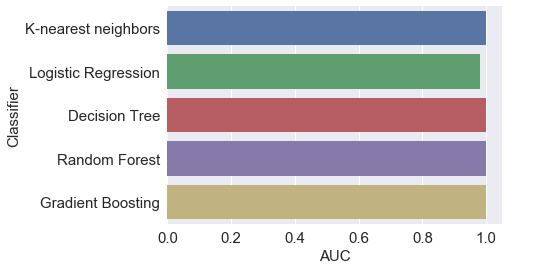

In [74]:
ax = sns.barplot(x="auc", y="classifier", data=df_results1)
ax.set_xlabel('AUC',fontsize = 15)
ax.set_ylabel('Classifier', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

# feature importance

In [75]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [77]:
feature_importances

,importance
classification,2.721243
owner_name_Analyst_6,0.212195
tenure_level,0.068848
alert_type_Daily_Heat,0.031428
alert_type_Weekly_Heat,-0.064043
owner_name_Analyst_4,-0.084012
alert_type_Monthly_Heat,-0.085534
Function_Group_Enabling,-0.129636
score,-0.158840
Function_Group_Production,-0.176493


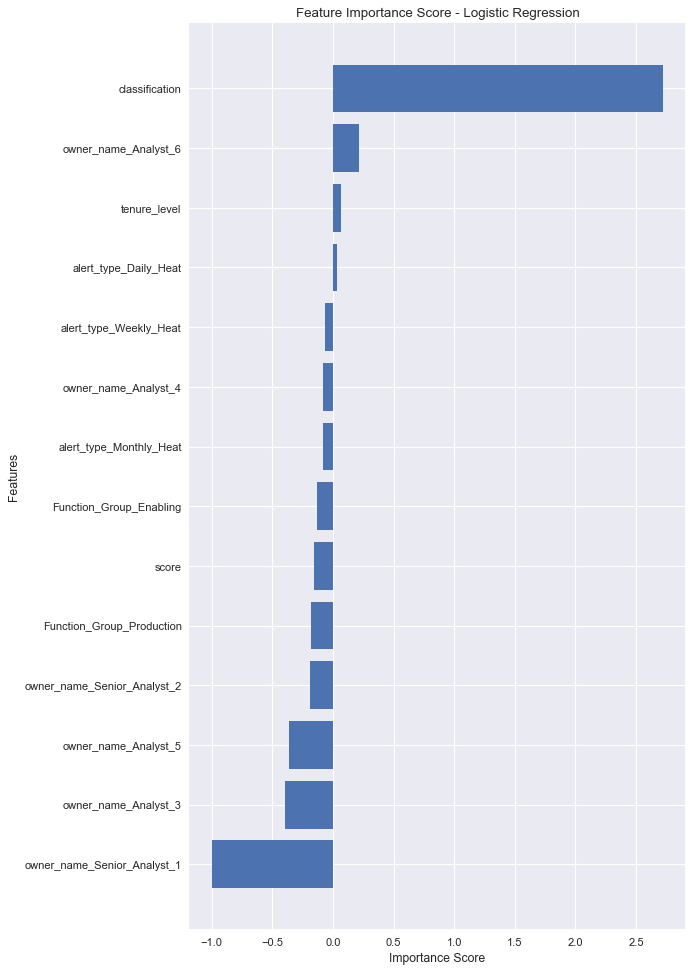

In [78]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [80]:
feature_importances1 = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances1.head()

,importance
classification,0.679890
owner_name_Analyst_4,0.132995
owner_name_Senior_Analyst_1,0.109629
owner_name_Analyst_6,0.027400
tenure_level,0.016681


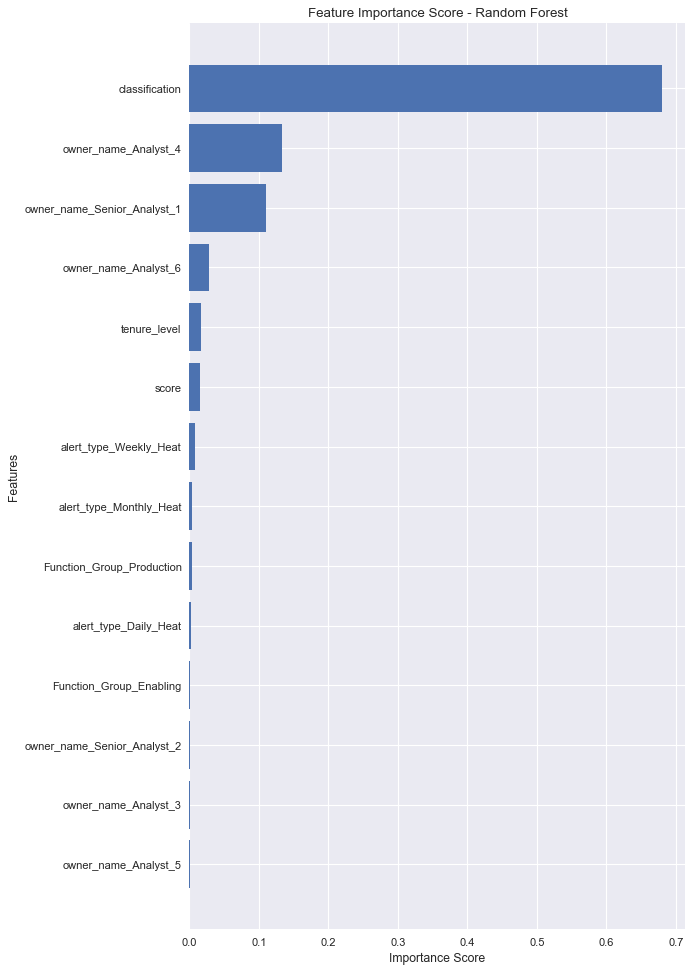

In [81]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances1.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances1.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

### Using RandomizedSearchCV, Optimize Gradient Boosting Tree Classifier

In [82]:
# Let's create a grid over a few of these (see the scikit-learn website for the descriptions).
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [83]:
# To use the RandomizedSearchCV function, we need something to score or evaluate a set of hyperparameters. 
# Here we will use the auc.
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [85]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

import time
t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

63.014424085617065


In [86]:
gbc_random.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [87]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:0.999
Validation AUC:0.999
Optimized gbc
Training AUC:1.000
Validation AUC:1.000


In [88]:
# You won't want to train your best classifier every time you want to run new predictions. 
# Therefore, we need to save the classifier. We will use the package pickle. 
# Pick gbc as the best classifier
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [90]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))

In [91]:
# load the data
df_train = pd.read_csv('df_train_all.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [92]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

C:\Users\minyi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [93]:
# calculate prediction probalility
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [94]:
# evaluate the performance
thresh = 0.38

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:1.000
accuracy:0.997
recall:1.000
precision:0.994
specificity:0.996
prevalence:0.388
 
Validation:
AUC:1.000
accuracy:0.997
recall:1.000
precision:0.994
specificity:0.996
prevalence:0.387
 
Test:
AUC:1.000
accuracy:0.998
recall:0.999
precision:0.995
specificity:0.997
prevalence:0.389
 


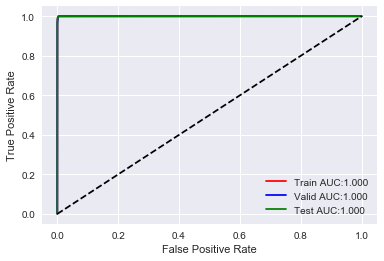

In [95]:
# plot ROC curve
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()